## Kelompok N
#### Anggota Kelompok:
1. Anantawidya Prayoga  (2006483523)
2. Angelina Putri   (2006464152)
3. Natania Agustin (2006572895)
4. Nurrochmi Andina (2006571103)
5. Valery Ongso (2006570965)

# TUGAS 1

In [ ]:
# Import module yang dibutuhkan
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
import scipy, itertools
from scipy import stats 
from collections import Counter
plt.style.use('bmh'); sns.set()

In [ ]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
price = pd.read_csv('data/price.csv')

--2021-04-13 04:09:24--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv’

price.csv           100%[===================>]  52.34K  --.-KB/s    in 0.001s  

2021-04-13 04:09:24 (49.1 MB/s) - ‘data/price.csv’ saved [53592/53592]



In [ ]:
#Load PreProcessed Data
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


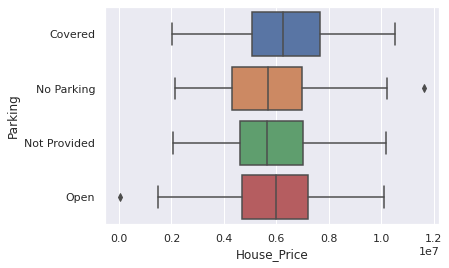

In [ ]:
# Boxplot
p = sns.boxplot(x="House_Price", y="Parking", data=price2)

Dari boxplot, terlihat bahwa data mengandung satu outlier atas.

In [ ]:
# Mendapatkan data outlier atas
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1 
print("Q1=(), Q3= (), IQR=()".format(Q1, Q3, IQR))
 
outliers_=(price2['House_Price'] > Q3  + 1.5*IQR) # outliers atasnya
price2.loc[outliers_].head()

Q1=(), Q3= (), IQR=()


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


# TUGAS 2

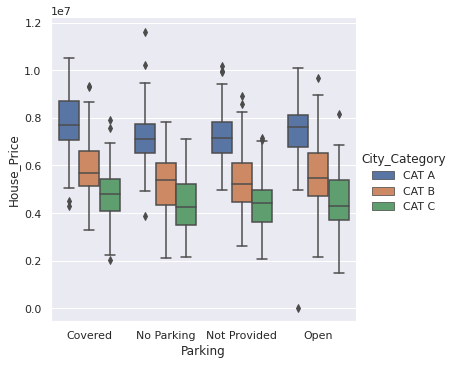

In [ ]:
# Boxplot
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

Dari boxplot, terlihat bahwa data mengandung 5 buah outlier bawah dengan rincian: 4 buah outlier pada kota A dan 1 buah outlier pada kota C. Kelima outlier akan dicari menggunakan proses slicing data.

### Slicing Kota A

1.1 Open, No Parking & Not Provided Parking

     Dist_Taxi  Dist_Market  Dist_Hospital  ...  City_Category  Rainfall House_Price
811        NaN          NaN            NaN  ...          CAT A       440       30000
409     8773.0      13547.0        15551.0  ...          CAT A       960     3860000
875     9997.0      12349.0        13043.0  ...          CAT A       770     4303000
320    11240.0       9781.0        15232.0  ...          CAT A       520     4496000
48      6407.0      10134.0        13433.0  ...          CAT A       870     4927000
..         ...          ...            ...  ...            ...       ...         ...
789    12262.0      12066.0        13268.0  ...          CAT A       820    10182000
428    16233.0      15074.0        18566.0  ...          CAT A      1310    10231000
453     5728.0      10253.0        11216.0  ...          CAT A       680    10292000
903     7767.0      13460.0         9901.0  ...          CAT A       980    10515000
678     7288.0       9560.0        12531.0  ...          CAT A   

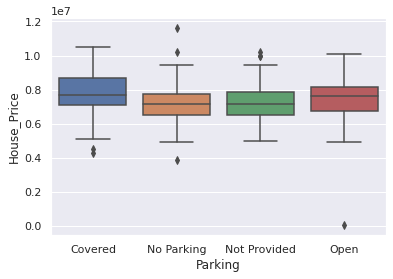

In [ ]:
urut = price2.sort_values(by=['City_Category','House_Price'])
condition = urut['City_Category'] == 'CAT A'
hampir = urut[condition]
print(hampir)
 
p = sns.boxplot (x="Parking", y="House_Price", data=hampir)
 
Q1 = hampir['House_Price'].quantile(0.25)
Q3 = hampir['House_Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Menampilkan data outlier bawahnya
outliers_ =(hampir['House_Price'] < (Q1 - 1.5 *IQR))
print(hampir.loc[outliers_])

     Dist_Taxi  Dist_Market  Dist_Hospital  ...  City_Category  Rainfall House_Price
811        NaN          NaN            NaN  ...          CAT A       440       30000
409     8773.0      13547.0        15551.0  ...          CAT A       960     3860000

[2 rows x 9 columns]


1.2 Covered Parking

     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Rainfall  House_Price Park_Covered
875     9997.0      12349.0        13043.0  ...       770      4303000            1
320    11240.0       9781.0        15232.0  ...       520      4496000            1
651     6745.0       5772.0         9747.0  ...       720      5073000            1
437     9405.0      12156.0        15118.0  ...       920      5209000            1
168     9487.0      10781.0        15148.0  ...      1230      5430000            1
..         ...          ...            ...  ...       ...          ...          ...
844    10410.0      13110.0        16559.0  ...      1270      9590000            1
92      1200.0       7579.0         7376.0  ...       940      9726000            1
585     3784.0      10365.0         9878.0  ...       700     10178000            1
453     5728.0      10253.0        11216.0  ...       680     10292000            1
903     7767.0      13460.0         9901.0  ...       980     10515000      

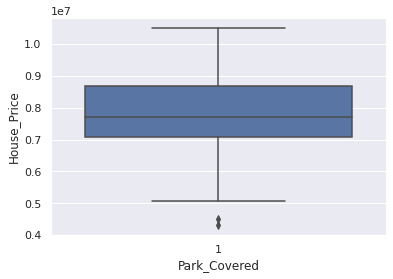

In [ ]:
urut = price2.sort_values(by=['City_Category','House_Price'])
df = pd.get_dummies(urut["Parking"], prefix="Park")
df2 = pd.concat([urut, df['Park_Covered']], axis = 1)
condition = (df2['City_Category'] == 'CAT A') & (df2['Park_Covered'] == 1)
hampir = df2[condition]
print(hampir)
 
p = sns.boxplot (x="Park_Covered", y="House_Price", data=hampir)
 
Q1 = hampir['House_Price'].quantile(0.25)
Q3 = hampir['House_Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Menampilkan data outlier bawahnya
outliers_ =(hampir['House_Price'] < (Q1 - 1.5 *IQR))
print(hampir.loc[outliers_])

     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Rainfall  House_Price Park_Covered
875     9997.0      12349.0        13043.0  ...       770      4303000            1
320    11240.0       9781.0        15232.0  ...       520      4496000            1

[2 rows x 10 columns]


### Slicing Kota C

     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Rainfall  House_Price Park_Covered
622     4619.0      10768.0        11787.0  ...       870      2027000            1
700     5627.0      13099.0        10068.0  ...      1250      2231000            1
234     7826.0      13333.0        11983.0  ...      1200      2441000            1
900     8475.0       8742.0        12781.0  ...       790      2560000            1
128     1637.0       7315.0         7685.0  ...       900      3277000            1

[5 rows x 10 columns]


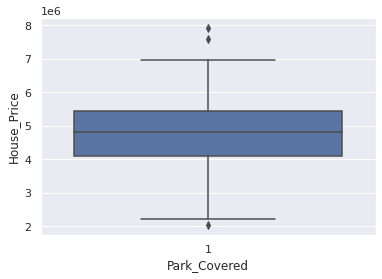

In [ ]:
urut = price2.sort_values(by=['City_Category','House_Price'])
df = pd.get_dummies(urut["Parking"], prefix="Park")
df2 = pd.concat([urut, df['Park_Covered']], axis = 1)
condition = (df2['City_Category'] == 'CAT C') & (df2['Park_Covered'] == 1)
hampir = df2[condition]
print(hampir.head())
 
p = sns.boxplot (x="Park_Covered", y="House_Price", data=hampir)
 
Q1 = hampir['House_Price'].quantile(0.25)
Q3 = hampir['House_Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Menampilkan data outlier bawahnya
outliers_ =(hampir['House_Price'] < (Q1 - 1.5 *IQR))
print(hampir.loc[outliers_])

     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Rainfall  House_Price Park_Covered
622     4619.0      10768.0        11787.0  ...       870      2027000            1

[1 rows x 10 columns]


Dari segi kategori kota dan ketersediaan tempat parkir, terdapat 5 rumah yang memiliki harga yang sangat rendah. Kelima rumah ini berpeluang besar mendapatkan keuntungan yang lebih besar.

##TUGAS 3

In [ ]:
#import module yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
#input data
tips = pd.read_csv('tips.csv')

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


###1. Adakah tipe variable yang kurang tepat di data tersebut?
Ada tipe varibel yang kurang tepat yaitu object, seharusnya tipe data nya adalah category karena variabel sex ,smoker,day, time bisa dibagi dalam grup" 

PS : Categorical variables represent types of data which may be divided into groups. Examples of categorical variables are race, sex, age group, and educational level

In [ ]:
tips.info() #ada yang variabelnya tidak tepat, harusnya nomor 3,4,5 category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
#mengubah dtype object menjadi dtype category
tips['sex'] = tips['sex'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')
tips['day'] = tips['day'].astype('category')
tips['time'] = tips['time'].astype('category')
tips.dtypes


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### 2. Apakah data numeriknya berdistribusi normal ?
A Normal Distribution is not skewed. It is perfectly symmetrical. 
Dilihat dari kurva-nya, data numerik skew kanan, maka data numerik TIDAK berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


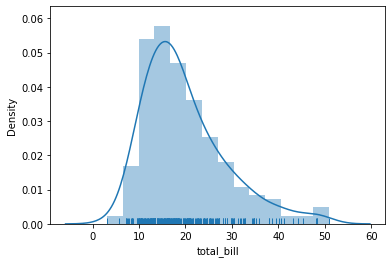

In [ ]:
p = sns.distplot(tips['total_bill'],kde=True, rug=True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


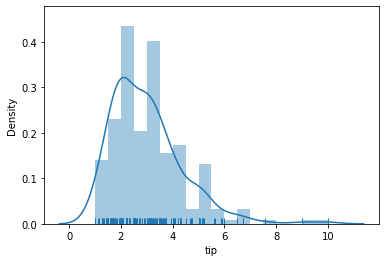

In [ ]:
q = sns.distplot(tips['tip'],kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


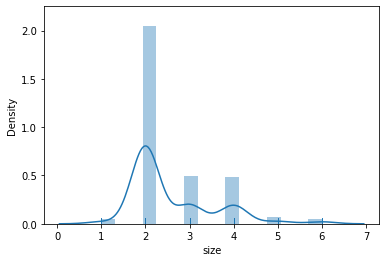

In [ ]:
r = sns.distplot(tips['size'],kde=True, rug=True)

### 3. Apakah ada outlier, noise, missing values, dan duplikasi data?
Outlier = Dilihat dari boxplot, terdapat outlier \
Noise = Bila dilihat tidak ada nilai minus dan sebagainya, maka tidak ada noise \
Missing values = Karena null nya 0 maka tidak ada missing values \
Duplikasi data = Ada 1 duplicated data

In [ ]:
#cek apakah ada noise
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [ ]:
#cek missing values 
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
#cek duplicate data 
print(tips.shape)
tips.duplicated().sum()

(244, 7)


1

In [ ]:
#menghapus entri yang memiliki data duplikat
tips.drop_duplicates(inplace = True) 
print(tips.duplicated().sum()) #cek apakah sudah tidak ada data duplikat
print(tips.shape) #cek apakah data duplikat sudah terhapus

0
(243, 7)


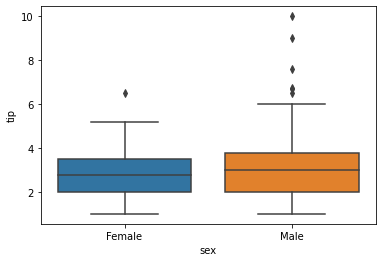

In [ ]:
#cek outlier
sns.boxplot(x='sex', y='tip', data=tips)
# Terlihat bahwa ada outlier atas

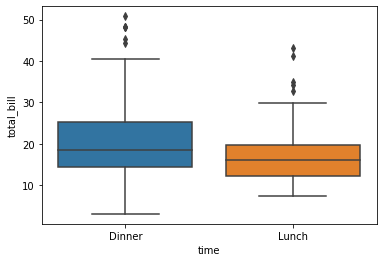

In [ ]:
#cek outlier
sns.boxplot(x='time', y='total_bill', data=tips)
# Terlihat bahwa ada outlier atas

### 4. Apakah pelanggan pria dan wanita cenderung proporsional (balance) ?
Dilihat dari gambar, ada kecenderungan pelanggan pria lebih banyak dari pada wanita (tidak balance)

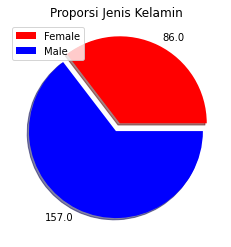

In [ ]:
data = tips['sex']

proporsion = Counter(data)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'b']
labels = proporsion.keys()
explode = (0.1, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Jenis Kelamin')
plt.legend(labels,loc='upper left')
plt.show()

### 5. Dari data yang ada apakah pria atau wanita ada kecenderungan untuk memberi tips lebih besar ?


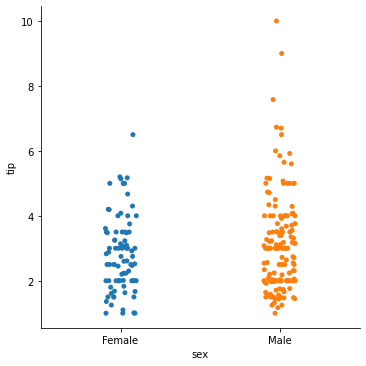

In [ ]:
a = sns.catplot(x='sex', y='tip',data = tips)
# Tidak ada kecenderungan pria atau wanita memberi tips lebih besar

### 6.apakah ada kecenderungan tips lebih besar dihari-hari tertentu ?

Dilihat dari polanya tips cenderung lebih besar saat weekend

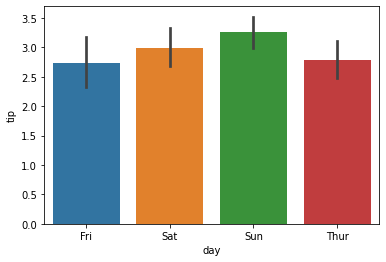

In [ ]:
sns.barplot(x='day', y='tip', data=tips,  estimator=np.mean)

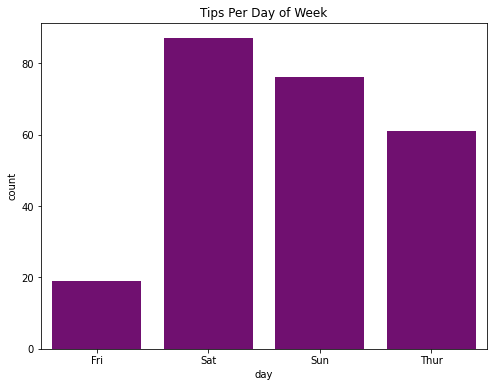

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Tips Per Day of Week")

sns.countplot(x=tips['day'],  color = 'purple')

### 7. Dari data yang ada apakah ada customer perokok cenderung memberi tips lebih besar ?

Customer perokok dan tidak perokok tidak ada kecenderungan memberi tips lebih besar

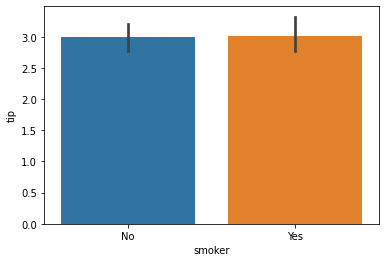

In [ ]:
sns.barplot(x='smoker', y='tip', data=tips ,estimator=np.mean)


### 8. Apakah pola 5 dan 7 dipengaruhi hari?
1. Pola soal nomor 5 dan hari:\
Dilihat dari polanya, ada indikasi bahwa customer male dipengaruhi hari, dimana pada hari sabtu male memberi tips cenderung tinggi, sedangkan female tidak dipengaruhi hari karena pada hari kamis,jumat,sabtu,minggu kisaran pemberian tips sama

2. Pola soal nomor 7 dan hari :\
Dilihat dari polanya, tidak ada pengaruh hari terhadap tip yang diberikan oleh customer perokok dan bukan perokok.


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use 

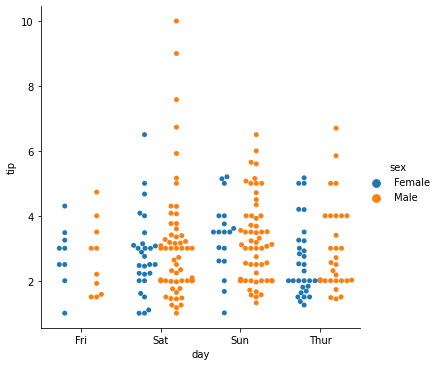

In [ ]:
sns.catplot(x="day", y="tip", hue="sex", kind="swarm", data=tips, split=True);
#Hari sabtu male kasih tips lebih besar, female tidak dipengaruhi

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use 

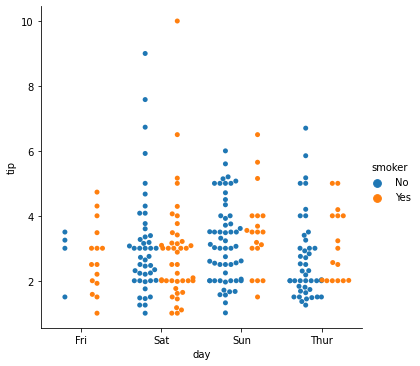

In [ ]:

sns.catplot(x="day", y="tip", hue="smoker", kind="swarm", data=tips, split=True);
#tidak dipengaruhi, karena datanya cenderung berkumpul di tempat yang sama, hanya sedikit yang di atas


### 9. Pola apalagi yang dapat anda temukan ?

1. Pengunjung yang datang paling banyak adalah pelanggan pria, tidak merokok, dan makan malam sehingga lebih baik background music manly , shift pegawai makan malam diperbanyak dan karena yang merokok hanya sendikit, ruang merokok dibuat kecil saja
2. Size of the party yang paling banyak adalah 2 , maka perbanyak meja untuk 2 orang
3. Semakin besar bill maka ada kecenderungan memberikan tips lebih banyak, maka bisa dibuat set menu sehingga pengunjung langsung membeli banyak dan waiter/waitress disarankan memberikan rekomendasi menu makanan yang mahal pada customer

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('Female', 'No', 'Dinner'),
               (0.0, 0.0, 0.1886975779931957, 0.625820907054006)),
              (('Female', 'No', 'Lunch'),
               (0.18947839555730547,
                0.0,
                0.16267032585620314,
                0.625820907054006)),
              (('Female', 'Yes', 'Dinner'),
               (0.0,
                0.6291431661902186,
                0.25254568089175544,
                0.3708568338097813)),
              (('Female', 'Yes', 'Lunch'),
               (0.2533264984558652,
                0.6291431661902186,
                0.09882222295764341,
                0.3708568338097813)),
              (('Male', 'No', 'Dinner'),
               (0.357123845791618,
                0.0,
                0.5091928302128246,
                0.6157817889413207)),
              (('Male', 'No', 'Lunch'),
               (0.8677421220226429,
                0.0,
                0.13225787797735708,
         

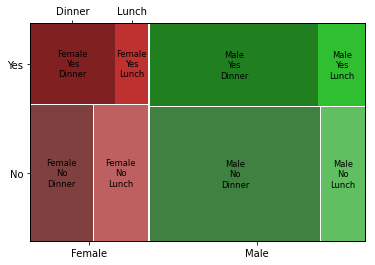

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(tips,['sex','smoker','time'])

#ada indikasi paling banyak customer cowok, tidak merokok, makan malam

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total')

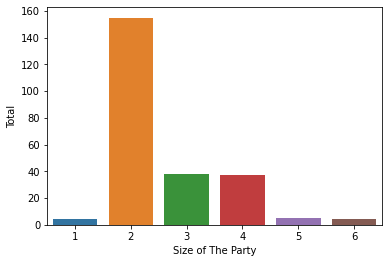

In [ ]:
sns.countplot('size', data=tips)
plt.xlabel('Size of The Party')
plt.ylabel('Total')
#Parties of two datang ke restaurant paling banyak

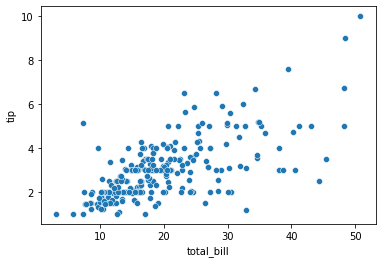

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data = tips)
#makin besar bill, tip makin banyak

###10. Dari hasil EDA anda, saran apa saja yang akan anda berikan ke pemilik restaurant tersebut ?

1. Mungkin akan lebih baik jika background music manly , shift pegawai makan malam diperbanyak dan karena yang merokok hanya sendikit, ruang merokok dibuat kecil saja
2. Ada kecenderungan bahwa size of the party yang paling banyak adalah 2 , maka disarankan untuk memperbanyak meja untuk 2 orang
3. Mungkin bisa dibuat set menu sehingga pengunjung langsung membeli banyak dan saat training, waiter/waitress diberikan arahan untuk merekomendasi menu makanan yang mahal pada customer


Skill/kompetensi apa yang terasa sangat dibutuhkan pada latihan ini : Kemampuan berpikir analitis dan memilih visualisasi untuk digunakan